In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# define an additional metric 
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / abs(true))

In [3]:
# impoting the strength database
from openpyxl import load_workbook
dataset = pd.read_excel('SC of UHPC joints_CM2.xlsx')

dataset.head()

,Jt,St,Bk,Dk/Hk,Bj,Ak,Aj,fc,Ft,lf,df,λf,σn,Vu
0,1,1,150,0.5,200,15000,160000,149.0,2,22.5,0.25,1.833333,10.0,1110.0
1,1,1,150,0.5,200,15000,160000,149.0,2,22.5,0.25,1.833333,20.0,1545.0
2,1,1,150,0.5,200,45000,160000,148.0,2,22.5,0.25,1.833333,10.0,1516.0
3,1,1,150,0.5,200,45000,160000,148.0,2,22.5,0.25,1.833333,20.0,2014.0
4,1,1,150,0.5,200,75000,160000,148.0,2,22.5,0.25,1.833333,10.0,2174.0


In [4]:
# define the inputs and the output
X = dataset.loc[:, dataset.columns != 'Vu']
y = dataset.loc[:, 'Vu']

print(X.shape)
print(y.shape)

(218, 13)
(218,)


In [5]:
# normalizing the whole data sets
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
# randomly spliting the database into training-testing sets as 80%-20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# 1 Model development

In [7]:
#defining GBR model
regr =  GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, random_state=10)

# testing the model
regr.fit(X_train, y_train) 
Z_1 = regr.predict(X_train)
Z_2 = regr.predict(X_test)

print("Training R2:", r2_score(y_train, Z_1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z_1)), "MAE:", mean_absolute_error(y_train, Z_1), "MAPE:", MAPE(y_train, Z_1)*100,"%")
print("Testing R2:", r2_score(y_test, Z_2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z_2)), "MAE:", mean_absolute_error(y_test, Z_2), "MAPE:", MAPE(y_test,Z_2)*100,"%")

Training R2: 0.9975884275526434 RMSE: 28.90626155749852 MAE: 16.889609793995795 MAPE: 3.2035271577809326 %
Testing R2: 0.9894629974186073 RMSE: 58.71266454432357 MAE: 45.180358896730446 MAPE: 8.598118261852242 %


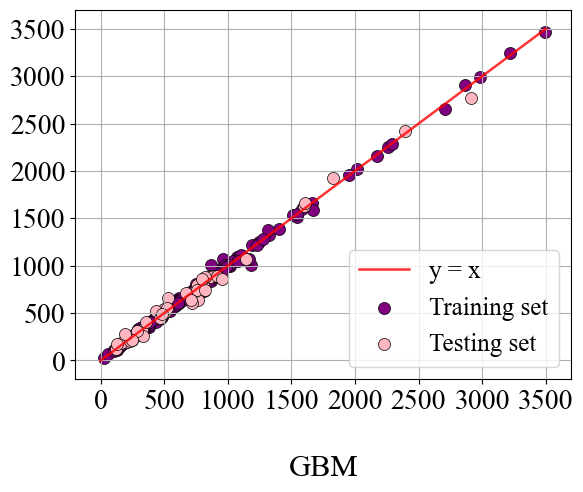

In [8]:
# plot the shear strength prediction results
xx = np.linspace(0, 3500, 100)
yy = xx

colors1 = 'purple'
colors2 = 'lightpink'

plt.figure()
plt.title('GBM',fontproperties = 'Times New Roman', size = 22, y=-0.3, va='bottom', ha='center')
plt.plot(xx, yy, linewidth=1.8, c ='red', alpha=0.8)
plt.scatter(y_train, Z_1, marker='o', s=75, c=colors1, linewidth=0.5, edgecolors='black')
plt.scatter(y_test, Z_2, marker='o', s=75, c=colors2, linewidth=0.5, edgecolors='black')
plt.grid()

plt.tick_params (axis='both',which='major',labelsize=20)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500], fontproperties = 'Times New Roman', size = 20)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500], fontproperties = 'Times New Roman', size = 20)

font1 = {'family': 'Times New Roman', 'size': 26}

plt.xlim([-200, 3700])
plt.ylim([-200, 3700])

plt.legend(['y = x','Training set','Testing set'], loc = 'lower right', prop={'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 18,})
plt.show()

# 2 SHAP Interpretation

In [9]:
# load JS visualization
import shap
shap.initjs()

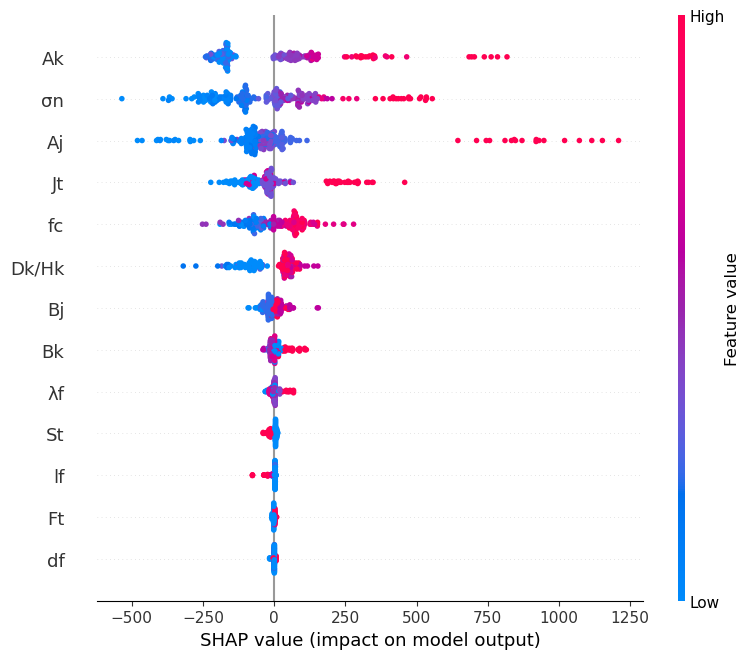

In [10]:
X = dataset.loc[:, dataset.columns != 'Vu']
# explain the model's predictions using SHAP
X_shap = scaler.transform(X)
X_shap = pd.DataFrame(X_shap, columns = X.columns)    
explainer = shap.TreeExplainer(regr)           
shap_values = explainer.shap_values(X_shap)   
shap.summary_plot(shap_values, X_shap,show=False)
plt.show()

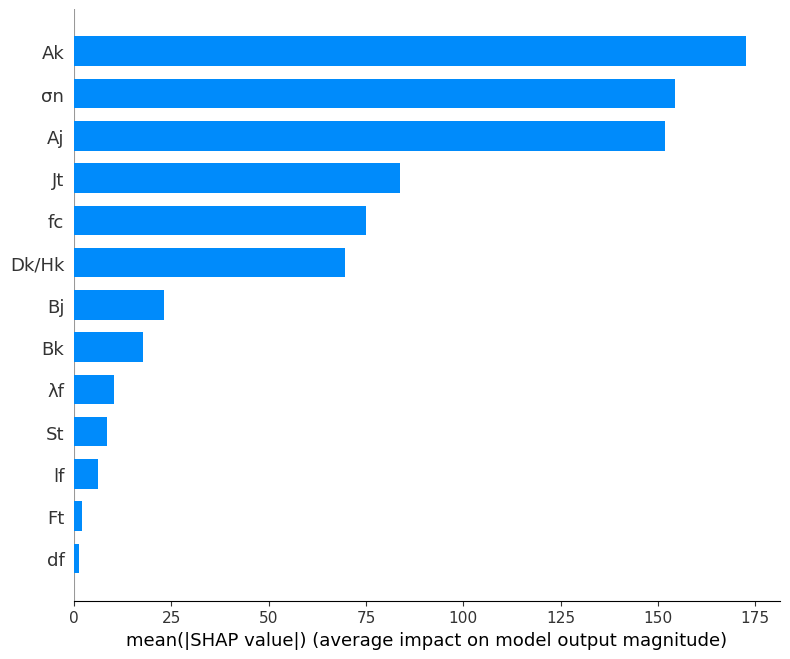

In [11]:
shap.summary_plot(shap_values, X_shap, show=False,plot_type="bar")

The figure layout has changed to tight
The figure layout has changed to tight


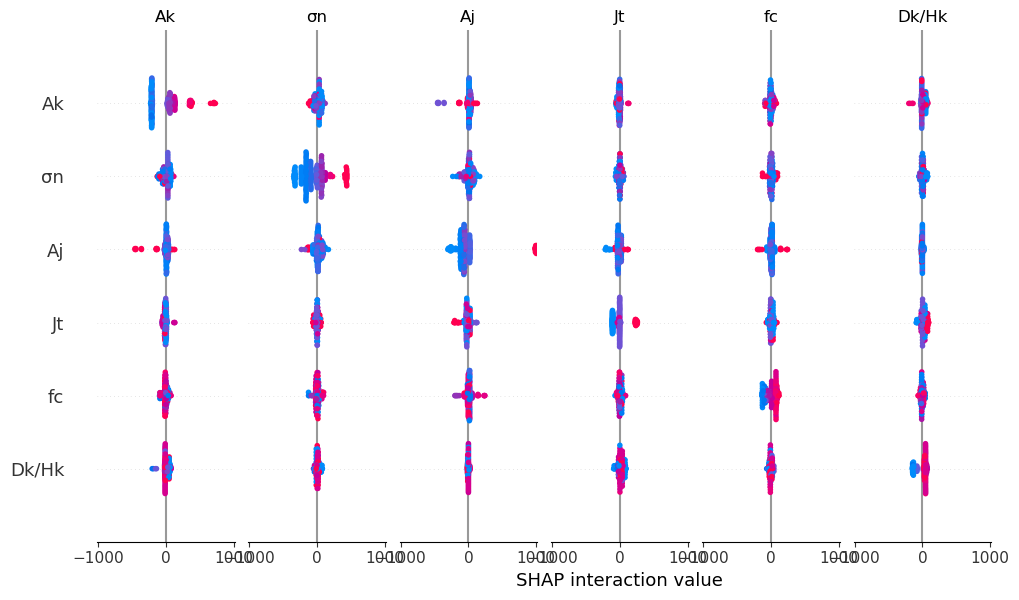

In [12]:
# # creat a SHAP interaction plot to show the interactive effect of several features
shap_interaction_values = shap.TreeExplainer(regr).shap_interaction_values(X_shap)
shap.summary_plot(shap_interaction_values, X_shap, max_display=6, show=False)

[]

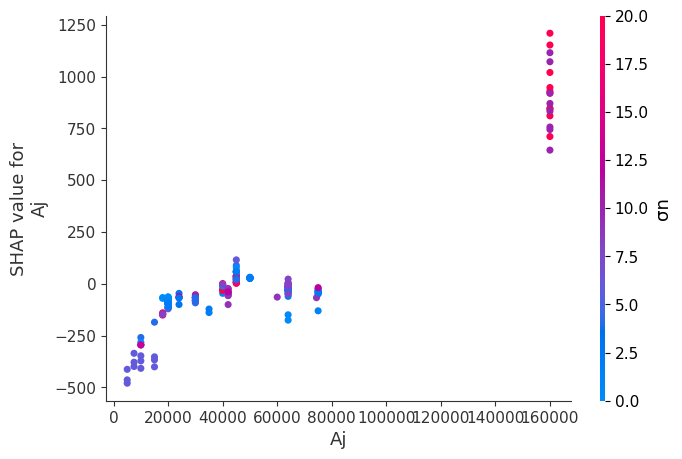

In [13]:
shap.dependence_plot ('Aj', shap_values, X, display_features=X_shap, interaction_index='σn', show=False, dot_size=26)
plt.plot()

[]

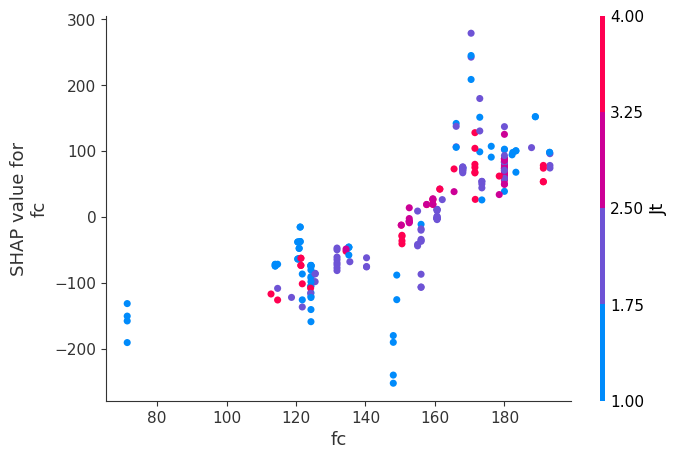

In [14]:
shap.dependence_plot ('fc', shap_values, X, display_features=X_shap, interaction_index='Jt', show=False, dot_size=26)
plt.plot()

[]

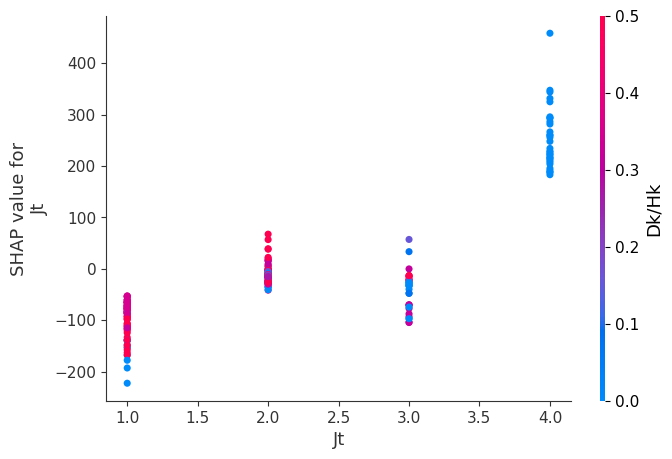

In [15]:
shap.dependence_plot ('Jt', shap_values, X, display_features=X_shap, interaction_index='Dk/Hk', show=False, dot_size=26)
plt.plot()

[]

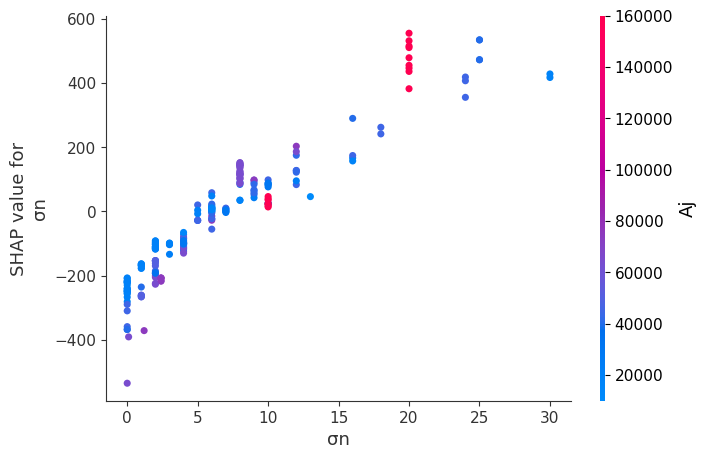

In [16]:
shap.dependence_plot ('σn', shap_values, X, display_features=X_shap, interaction_index='Aj', show=False, dot_size=26)
plt.plot()

[]

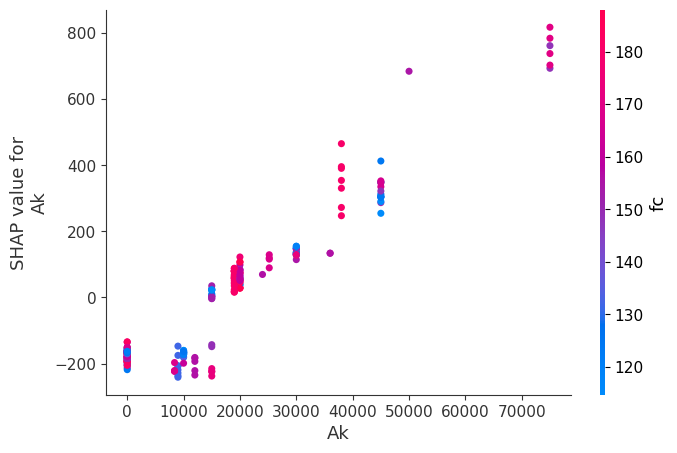

In [17]:
shap.dependence_plot ('Ak', shap_values, X, display_features=X_shap, interaction_index='fc', show=False, dot_size=26)
plt.plot()

[]

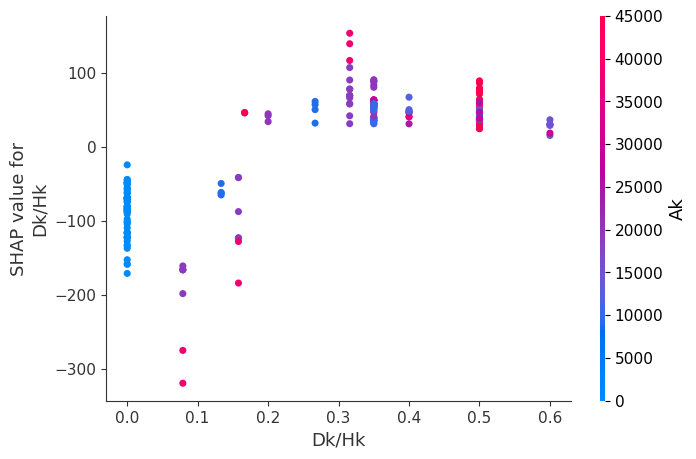

In [18]:
shap.dependence_plot ('Dk/Hk', shap_values, X, display_features=X_shap, interaction_index='Ak', show=False, dot_size=26)
plt.plot()

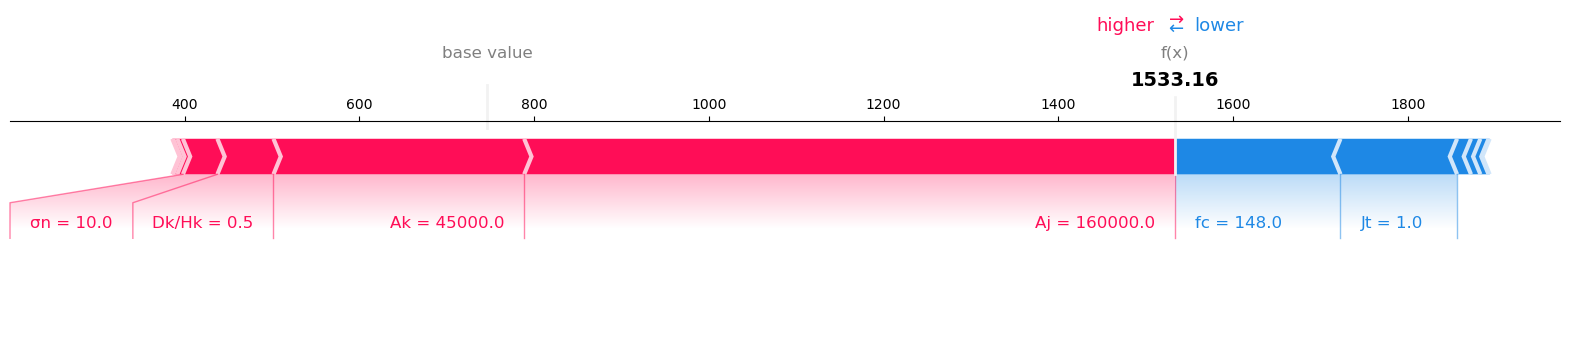

In [19]:
# Single value explainer
shap.force_plot(explainer.expected_value, shap_values[2], X.iloc[2], matplotlib=True)

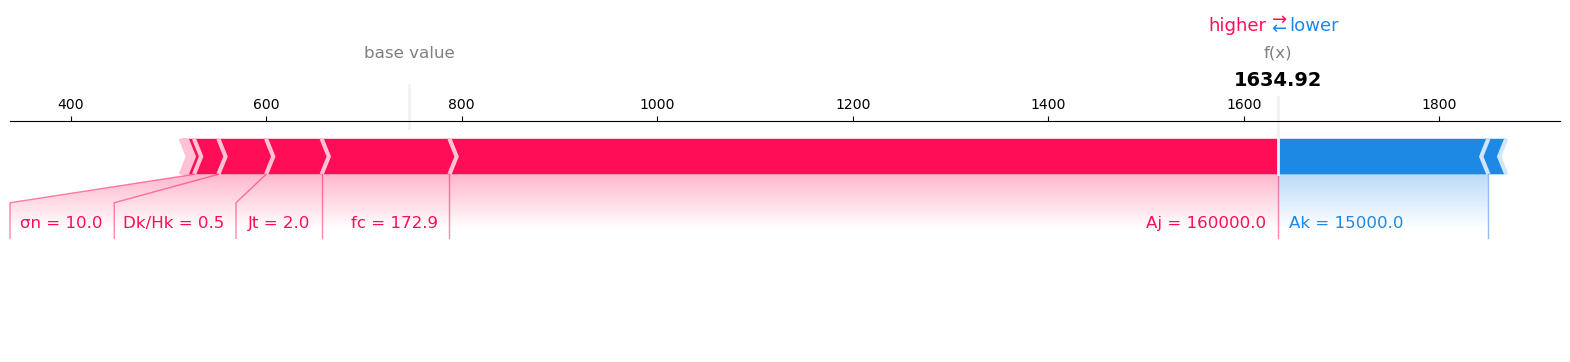

In [20]:
# Single value explainer
shap.force_plot(explainer.expected_value, shap_values[76], X.iloc[76], matplotlib=True)

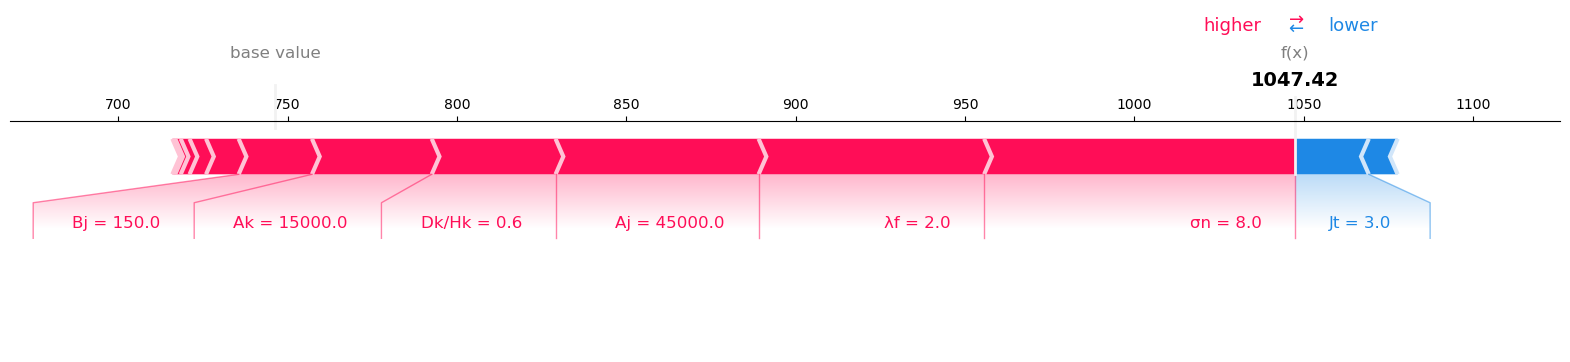

In [21]:
# Single value explainer
shap.force_plot(explainer.expected_value, shap_values[203], X.iloc[203], matplotlib=True)

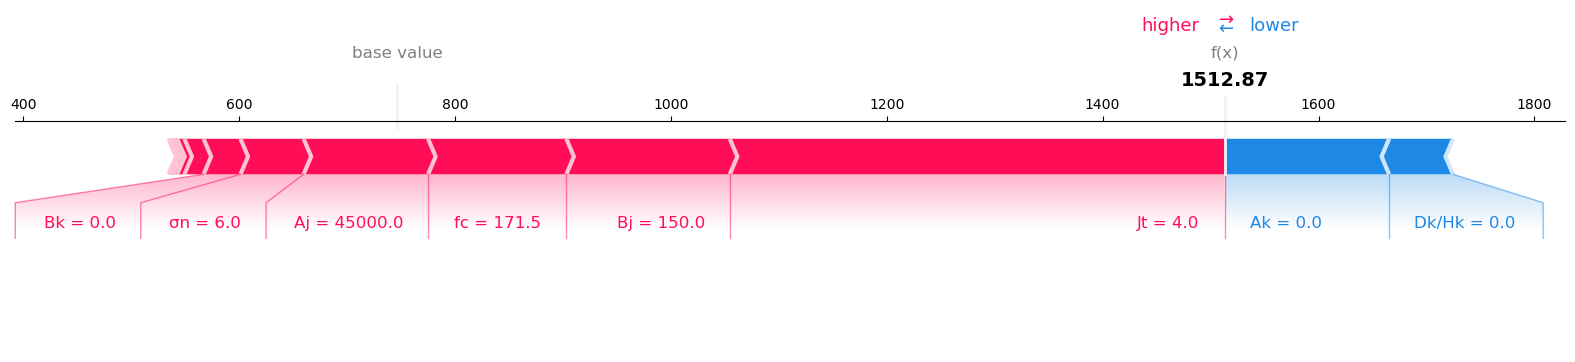

In [22]:
# Single value explainer
shap.force_plot(explainer.expected_value, shap_values[213], X.iloc[213], matplotlib=True)